# Denoising Autoencoder

## Imports

In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

## Prepare Dataset

### Load MNIST Dataset

In [3]:
from keras.datasets import mnist

(clean_img_train, _), (clean_img_test, _) = mnist.load_data()

### Create Noisy Images

In [4]:
clean_img_train = clean_img_train.astype('float32') / 255.
clean_img_test = clean_img_test.astype('float32') / 255.

noise_factor = 0.5
noisy_img_train = clean_img_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=clean_img_train.shape)
noisy_img_test = clean_img_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=clean_img_test.shape)

noisy_img_train = np.clip(noisy_img_train, 0., 1.)
noisy_img_test = np.clip(noisy_img_test, 0., 1.)

### Plot Dataset

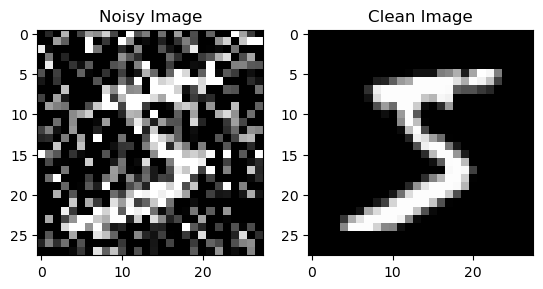

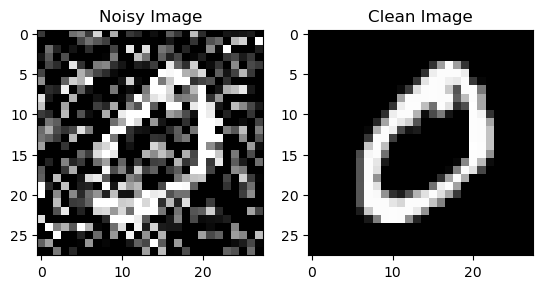

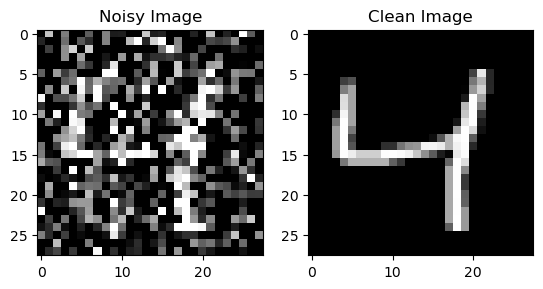

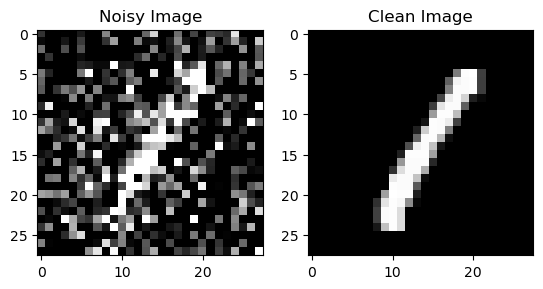

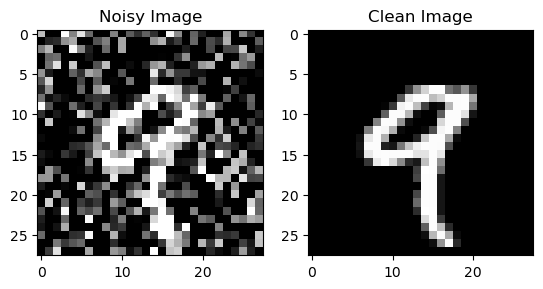

In [5]:
n = 5
for i in range(n):
    plt.figure()
    plt.subplot(121)
    plt.title('Noisy Image')
    plt.imshow(noisy_img_train[i], cmap='gray')
    plt.subplot(122)
    plt.title('Clean Image')
    plt.imshow(clean_img_train[i], cmap='gray')

## Denoising Autoencoder Architecture

In [6]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = keras.Model(input, x)
autoencoder.compile(optimizer="adam", loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       2320  

## Train

In [7]:
H = autoencoder.fit(noisy_img_train, clean_img_train,
                    epochs=100,
                    batch_size=512,
                    shuffle=True,
                    validation_data=(noisy_img_test, noisy_img_test))

Epoch 1/100
118/118 [==============================] - 8s 26ms/step - loss: 0.3927 - val_loss: 0.9660
Epoch 2/100
118/118 [==============================] - 3s 22ms/step - loss: 0.1639 - val_loss: 1.4144
Epoch 3/100
118/118 [==============================] - 3s 22ms/step - loss: 0.1332 - val_loss: 1.4597
Epoch 4/100
118/118 [==============================] - 3s 22ms/step - loss: 0.1271 - val_loss: 1.4385
Epoch 5/100
118/118 [==============================] - 3s 22ms/step - loss: 0.1230 - val_loss: 1.4124
Epoch 6/100
118/118 [==============================] - 3s 23ms/step - loss: 0.1199 - val_loss: 1.4327
Epoch 7/100
118/118 [==============================] - 3s 23ms/step - loss: 0.1177 - val_loss: 1.4176
Epoch 8/100
118/118 [==============================] - 3s 23ms/step - loss: 0.1160 - val_loss: 1.4148
Epoch 9/100
118/118 [==============================] - 3s 23ms/step - loss: 0.1145 - val_loss: 1.3973
Epoch 10/100
118/118 [==============================] - 3s 24ms/step - loss: 0.113

## Save Model

In [8]:
autoencoder.save('denoising_ae_model.h5')

## Load Model

In [9]:
autoencoder = keras.models.load_model('denoising_ae_model.h5')

## Training Results

[]

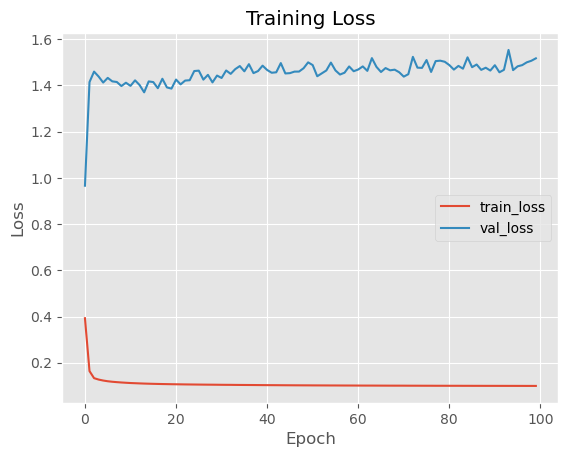

In [10]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.plot()

## Test Results

### Test Loss

In [11]:
test_loss = autoencoder.evaluate(noisy_img_test,  clean_img_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0990


### Plot Denoised Images

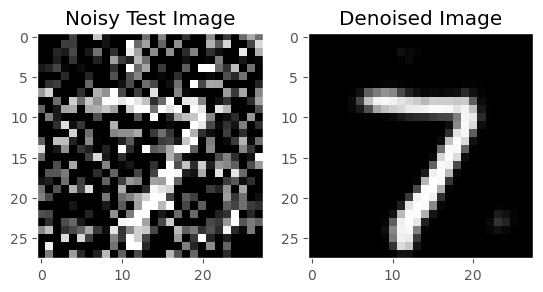

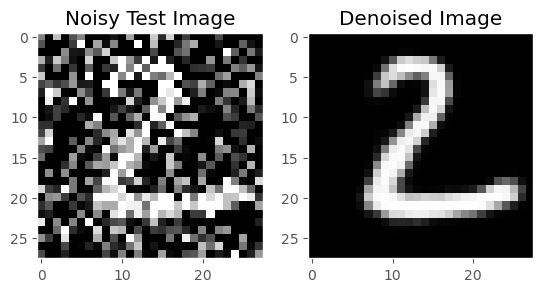

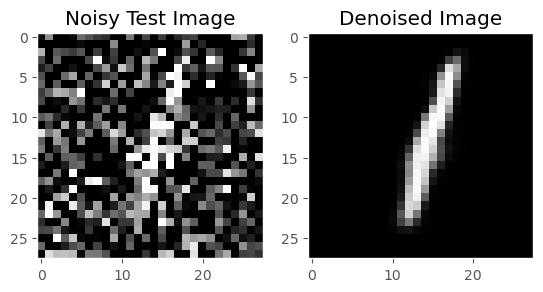

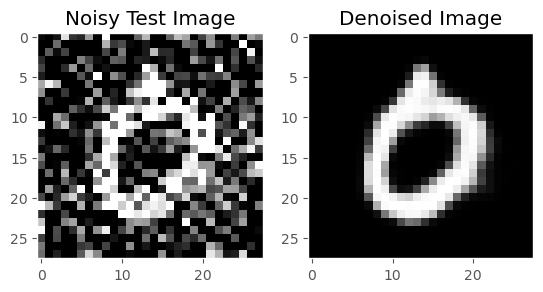

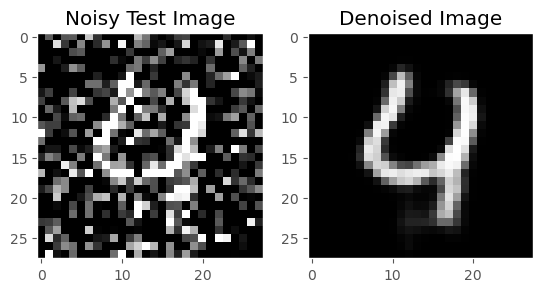

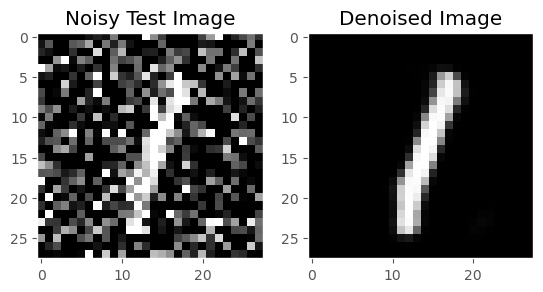

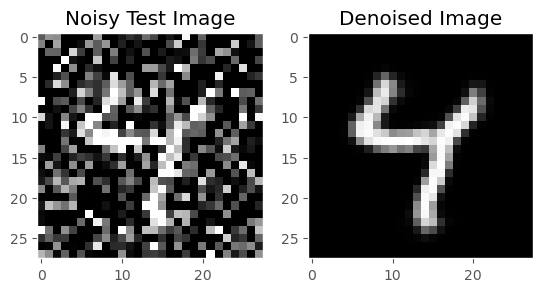

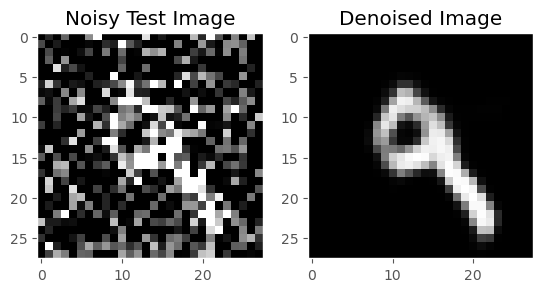

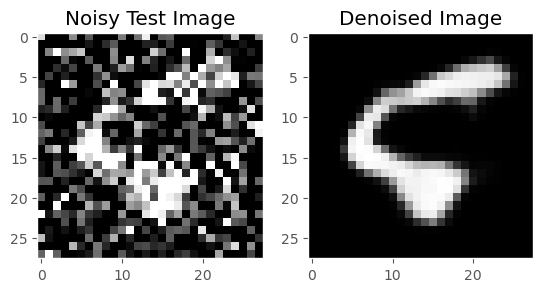

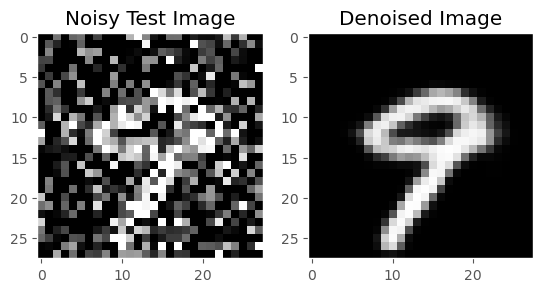

In [12]:
for i in range(10): 
    plt.figure()
    plt.subplot(121)
    plt.grid(False)
    plt.title('Noisy Test Image')
    plt.imshow(noisy_img_test[i],cmap='gray')
    plt.subplot(122)
    plt.grid(False)
    
    predicted_img = autoencoder.predict(noisy_img_test[i].reshape(1, 28, 28, 1), verbose=0)

    predicted_img = predicted_img[0][:,:,0]
    
    plt.title('Denoised Image')
    plt.imshow(predicted_img ,cmap='gray')